In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [8]:
import scipy.io as sio
import os

batch_size = 256
input_shape = (240,240)
train_dir = 'G:\\Data\\stanford-car-dataset-by-classes-folder\\car_data\\train'
test_dir = 'G:\\Data\\stanford-car-dataset-by-classes-folder\\car_data\\test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=train_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [9]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras import Model
import efficientnet.keras as efn

base_model = efn.EfficientNetB1(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# fix the feature extraction part of the model
for layer in base_model.layers:
    layer.trainable = False

model.summary()

Using TensorFlow backend.


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
27164672/27164032 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None,

Epoch 1/20
31/31 [==============================] - 51s 2s/step - loss: 5.1687 - acc: 0.0243 - val_loss: 5.0743 - val_acc: 0.0280
Epoch 2/20
31/31 [==============================] - 30s 968ms/step - loss: 4.6309 - acc: 0.1407 - val_loss: 4.8778 - val_acc: 0.0455
Epoch 3/20
31/31 [==============================] - 34s 1s/step - loss: 4.2113 - acc: 0.2496 - val_loss: 4.7446 - val_acc: 0.0611
Epoch 4/20
31/31 [==============================] - 34s 1s/step - loss: 3.8809 - acc: 0.3182 - val_loss: 4.6419 - val_acc: 0.0668
Epoch 5/20
31/31 [==============================] - 34s 1s/step - loss: 3.5738 - acc: 0.3792 - val_loss: 4.5976 - val_acc: 0.0741
Epoch 6/20
31/31 [==============================] - 34s 1s/step - loss: 3.3450 - acc: 0.4172 - val_loss: 4.5542 - val_acc: 0.0722
Epoch 7/20
31/31 [==============================] - 33s 1s/step - loss: 3.1495 - acc: 0.4404 - val_loss: 4.5478 - val_acc: 0.0736
Epoch 8/20
31/31 [==============================] - 31s 998ms/step - loss: 2.9326 - acc

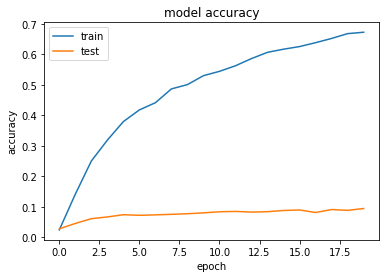

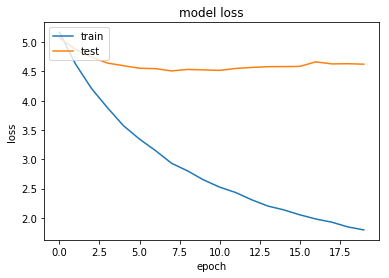

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=20,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
batch_size = 32
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=train_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


for layer in model.layers:
    layer.trainable = True
    
model.summary()

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
_____________________

Epoch 1/20
254/254 [==============================] - 128s 503ms/step - loss: 1.4278 - acc: 0.6239 - val_loss: 1.4652 - val_acc: 0.6067
Epoch 2/20
254/254 [==============================] - 109s 427ms/step - loss: 0.5406 - acc: 0.8494 - val_loss: 1.2224 - val_acc: 0.6780
Epoch 3/20
254/254 [==============================] - 108s 426ms/step - loss: 0.3368 - acc: 0.9013 - val_loss: 0.9420 - val_acc: 0.7422
Epoch 4/20
254/254 [==============================] - 108s 427ms/step - loss: 0.2475 - acc: 0.9263 - val_loss: 0.8996 - val_acc: 0.7591
Epoch 5/20
254/254 [==============================] - 108s 426ms/step - loss: 0.2093 - acc: 0.9393 - val_loss: 1.0855 - val_acc: 0.7192
Epoch 6/20
254/254 [==============================] - 108s 424ms/step - loss: 0.1716 - acc: 0.9498 - val_loss: 0.8550 - val_acc: 0.7791
Epoch 7/20
254/254 [==============================] - 107s 423ms/step - loss: 0.1469 - acc: 0.9579 - val_loss: 0.8471 - val_acc: 0.7754
Epoch 8/20
254/254 [============================

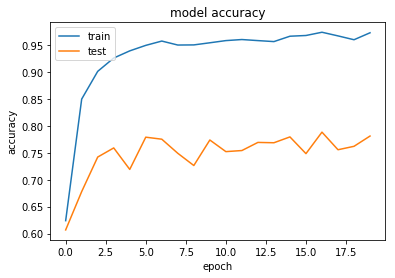

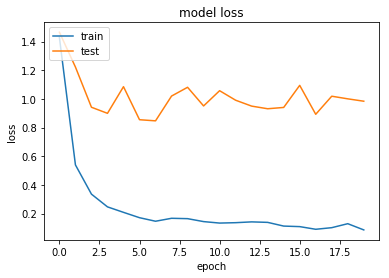

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=20,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()